## Computing velocity and acceleration of x,y data

based on http://stackoverflow.com/questions/28269379/curve-curvature-in-numpy among other information.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
a = np.array([ [  0.  ,   0.  ],[  0.3 ,   0.  ],[  1.25,  -0.1 ],
              [  2.1 ,  -0.9 ],[  2.85,  -2.3 ],[  3.8 ,  -3.95],
              [  5.  ,  -5.75],[  6.4 ,  -7.8 ],[  8.05,  -9.9 ],
              [  9.9 , -11.6 ],[ 12.05, -12.85],[ 14.25, -13.7 ],
              [ 16.5 , -13.8 ],[ 19.25, -13.35],[ 21.3 , -12.2 ],
              [ 22.8 , -10.5 ],[ 23.55,  -8.15],[ 22.95,  -6.1 ],
              [ 21.35,  -3.95],[ 19.1 ,  -1.9 ]])

In [5]:
x=a[:, 0]
y=a[:, 1]

In [6]:
dx_dt = np.gradient(a[:, 0])
dy_dt = np.gradient(a[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])

In [7]:
velx=velocity[:,0]
vely=velocity[:,1]

In [8]:
ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)

In [9]:
tangent = np.array([1/ds_dt] * 2).transpose() * velocity

In [10]:
np.sqrt(tangent[:,0] * tangent[:,0] + tangent[:,1] * tangent[:,1])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
tangent_x = tangent[:, 0]
tangent_y = tangent[:, 1]

deriv_tangent_x = np.gradient(tangent_x)
deriv_tangent_y = np.gradient(tangent_y)

dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

In [12]:
d2s_dt2 = np.gradient(ds_dt)
d2x_dt2 = np.gradient(dx_dt)
d2y_dt2 = np.gradient(dy_dt)

curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
t_component = np.array([d2s_dt2] * 2).transpose()
n_component = np.array([curvature * ds_dt * ds_dt] * 2).transpose()

acceleration = t_component * tangent + n_component * normal

In [13]:
w=np.sqrt(velx**2+vely**2)

<IPython.core.display.Javascript object>


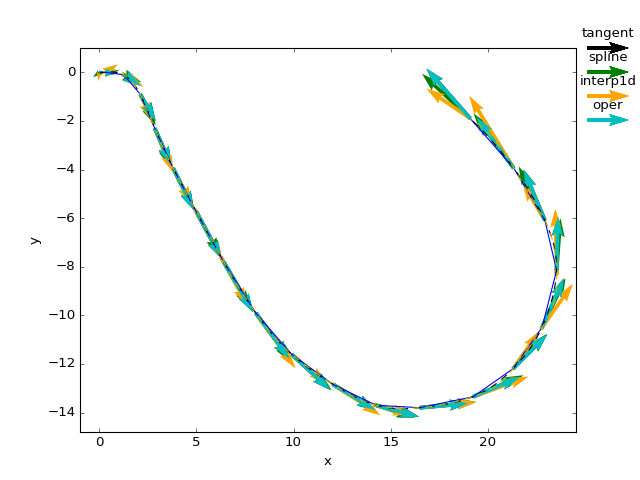

In [14]:
plt.figure()
plt.plot(x,y,'-')
QV1=plt.quiver(x,y,velx,vely, angles='xy', scale_units='xy', scale = 1)
#plt.quiver(x,y,acceleration[:,0],acceleration[:,1], angles='xy', scale_units='xy', scale = 1, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([x.min()-1,x.max()+1])
plt.ylim([y.min()-1,y.max()+1])
#plt.savefig(outdirplot+'/track.png')
plt.quiverkey(QV1, .95, 0.9, w.mean(), 'tangent', coordinates='figure')
plt.show()

## using splines

In [15]:
from scipy.interpolate import interp1d, splrep, splev

In [16]:
tsec=np.arange(x.size) # define a time reference

In [17]:
t1000=np.linspace(tsec[0],tsec[-1],100,endpoint=True)  # create an array of equally spaced points that spans the time with 1000 points

In [18]:
        tck=splrep(tsec,x,s=0)
        x1000 = splev(t1000,tck,der=0)
        tckv=splrep(t1000,x1000,s=0)
        u1000 = splev(t1000,tckv,der=1)


        tck=splrep(tsec,y,s=0)
        y1000 = splev(t1000,tck,der=0)
        tckv=splrep(t1000,y1000,s=0)
        v1000 = splev(t1000,tckv,der=1)

#### define the values for the original points

In [19]:
idx=[]
for i in range(tsec.size):
    idx.append((np.abs(t1000-tsec[i])).argmin())

In [20]:
t1000[idx]

array([  0.        ,   0.95959596,   1.91919192,   3.07070707,
         4.03030303,   4.98989899,   5.94949495,   6.90909091,
         8.06060606,   9.02020202,   9.97979798,  10.93939394,
        12.09090909,  13.05050505,  14.01010101,  14.96969697,
        15.92929293,  17.08080808,  18.04040404,  19.        ])

In [21]:
tsec

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [22]:
QV2=plt.quiver(x1000[idx],y1000[idx],u1000[idx],v1000[idx], angles='xy', scale_units='xy',scale=1, color='g')

In [23]:
plt.quiverkey(QV2, .95, 0.85, w.mean(), 'spline', coordinates='figure')

In [24]:
plt.plot(x1000,y1000,'k--') # plot the splined curve

Note the problems at the end points. Also the fitting slightly changes the values in every point

## use  interp1d

In [25]:
fx=interp1d(tsec,x,kind='quadratic')
fy=interp1d(tsec,y,kind='quadratic')
x1000 = fx(t1000)
y1000 = fy(t1000)

In [26]:
u=np.gradient(x1000)/np.gradient(t1000)
v=np.gradient(y1000)/np.gradient(t1000)

In [27]:
plt.plot(x1000,y1000,'y--') # plot the curve

In [28]:
QV3=plt.quiver(x1000[idx],y1000[idx],u[idx],v[idx], angles='xy', scale_units='xy',scale=1, color='orange')

In [29]:
plt.quiverkey(QV3, .95, 0.8, w.mean(), 'interp1d', coordinates='figure')

similar issues due to the curve fitting

## trigonometric  approach

In [30]:
s1000 = np.cumsum(np.sqrt(np.ediff1d(x1000)**2+np.ediff1d(y1000)**2))
s1000 = np.insert(s1000,0,0)  # adding 0 for the first point

In [31]:
#create 2 arrays for facilitating the central difference computation below.
dt=tsec[1]-tsec[0]  # time increment, depends on the number of points, default 12 hours
t1=np.maximum(tsec-dt,tsec[0]) # extend for the low end the first value 
t2=np.minimum(tsec+dt,tsec[-1]) # extend for the high end the last value

In [32]:
t1,t2

(array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 19]))

In [33]:
(t2-t1)

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [34]:
fs=interp1d(t1000,s1000,kind='quadratic')
s1=fs(t1)  # compute values for points t1 
s2=fs(t2)  # compute values for points t2

#define  a linear interpolation function x(t) 
fx=interp1d(t1000,x1000,kind='quadratic')
x1=fx(t1)
x2=fx(t2)


#define  a linear interpolation function y(t) 
fy=interp1d(t1000,y1000,kind='quadratic')
y1=fy(t1)
y2=fy(t2)



In [35]:
cincl=(x2-x1)/(s2-s1) # compute cos(phi)=dx/ds on the tranjectory
sincl=(y2-y1)/(s2-s1) # compute sin(phi)=dy/ds on the tranjectory
vt=(s2-s1)/(t2-t1)  # compute translational velocity ds/dt

In [36]:
vtrx = vt * cincl[:]
vtry = vt * sincl[:]

In [37]:
QV4=plt.quiver(x,y,vtrx,vtry, angles='xy', scale_units='xy',scale=1, color='c')

In [38]:
plt.quiverkey(QV4, .95, 0.75, w.mean(), 'oper', coordinates='figure')

## compare values

In [39]:
import pandas as pd

In [40]:
dic={ 'us': u1000[idx], 'vs':v1000[idx], 'ui': u[idx], 'vi':v[idx],'uh':vtrx, 'vh':vtry,'u':velocity[:,0], 'v':velocity[:,1] }

In [41]:
check=pd.DataFrame(dic)

In [42]:
check

,u,uh,ui,us,v,vh,vi,vs
0,0.300,0.298067,-0.058025,-0.333443,0.000,0.002499,-0.358025,-0.205375
1,0.625,0.626032,0.693132,0.752205,-0.050,-0.050674,0.348275,0.081104
2,0.900,0.901031,1.106970,0.984842,-0.450,-0.451294,-0.542870,-0.338780
3,0.800,0.798569,0.591991,0.745346,-1.100,-1.098930,-1.030550,-1.199820
4,0.850,0.849772,0.941969,0.823165,-1.525,-1.524754,-1.788069,-1.575868
5,1.075,1.075772,0.965923,1.081788,-1.725,-1.725782,-1.507017,-1.713235
6,1.300,1.300381,1.414637,1.288612,-1.925,-1.925363,-2.085682,-1.907377
7,1.525,1.523723,1.363082,1.501136,-2.075,-2.073649,-1.980140,-2.132497
8,1.750,1.750416,1.925388,1.749223,-1.900,-1.900620,-2.146409,-1.920775
9,2.000,2.001498,1.798975,2.015995,-1.475,-1.476754,-1.209571,-1.442393
